In [1]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Prakriti\Downloads\BostonHousing.csv")

In [4]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
data.shape

(506, 14)

In [7]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
#understanding the correlation if it is positive or negetive
correlation=data.corr() #saving the data correlation into the word correlation

<Axes: >

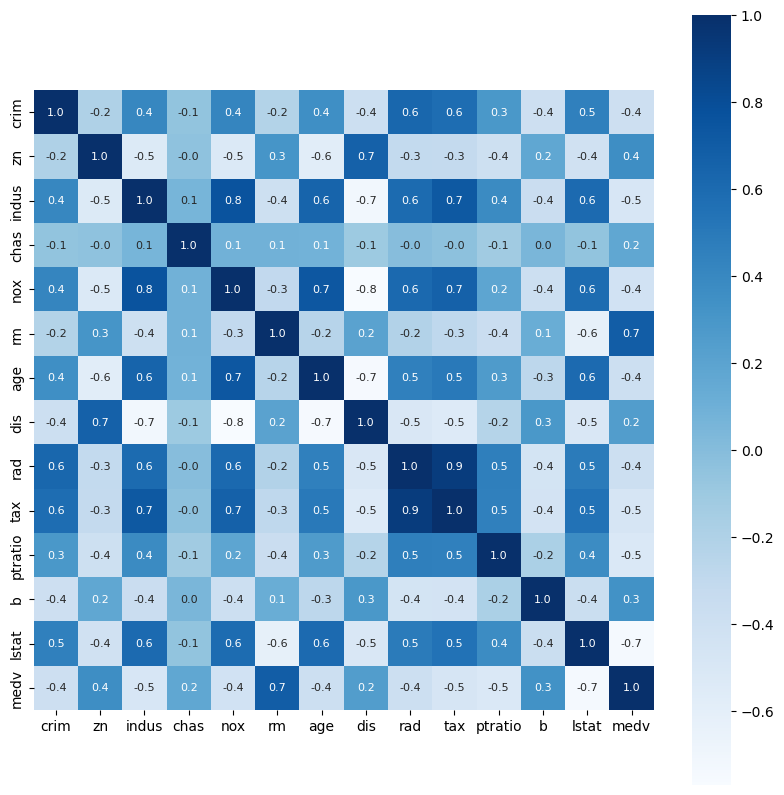

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, square=True, fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [12]:
#splitting the target and the labels
x=data.drop(['medv'],axis=1)
y=data['medv']

In [13]:
print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [14]:
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [15]:
#splitting the test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [17]:
print(y.shape,y_train.shape,y_test.shape)

(506,) (404,) (102,)


In [24]:
#model training
#XG Boost Regressor
from xgboost import XGBRegressor
model=XGBRegressor()

In [25]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
#evaluation
#prediction on training data
training_data_prediction = model.predict(x_train)

In [23]:
print(training_data_prediction)

[11.990929  19.915493  19.392988  13.408072  18.19098   24.603947
 21.08647   24.697266   8.70618   27.501347  20.708258  36.17404
 31.59529   11.69739   39.802494  13.893334  21.796898  23.695662
 17.590319  24.409176   8.799549  19.181791  25.278059  20.410582
 23.10783   37.90089   15.601625  45.400623  15.706774  22.599428
 14.514692  18.697655  17.797323  16.117708  20.609972  31.598558
 29.095152  15.600668  17.563873  22.51095   19.401443  19.287243
  8.4968405 20.607521  17.006351  17.093975  14.495169  49.98619
 14.284735  12.609954  28.688086  21.203852  19.306932  23.089056
 19.10372   25.004898  33.408142   4.992768  29.599434  18.685545
 21.707012  23.096918  22.802471  20.991085  48.796387  14.627051
 16.613852  27.075224  20.087227  19.794464  20.992268  41.290615
 23.175125  20.378569  18.558722  29.399414  36.40198   24.388987
 11.816533  13.792832  12.272116  17.794773  33.087368  26.73878
 13.393904  14.386449  50.004574  21.98985   19.906004  23.784376
 17.516703  1

In [27]:
#in classification problem we use accuracy score and in regression problem we use r squared and mean squared error to check how well our data is doing therefore here we will be comparing the normal training data and the data with xgbregressor
from sklearn import metrics
#R Squared error
score_1=metrics.r2_score(y_train,training_data_prediction)

#mean Squared error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)

print(score_1)
print(score_2)

0.9999969829984965
0.011182523717974735


In [28]:
#prediction on testind data
#prediction on training data
testing_data_prediction = model.predict(x_test)

In [29]:
print(testing_data_prediction)

[24.276764  30.46075   17.959005  22.965069  17.133715  22.163433
 18.669397  15.236069  21.046127  20.459925  22.439089  18.89959
 11.203732  21.811333  18.655327  26.25912   21.139784   9.210471
 47.378334  15.913627  25.087412  26.079153  13.452615  21.082066
 15.193554  15.992098  20.690847  13.094459  21.131876  21.168287
 18.848736  23.033901  14.877705  21.35931   15.263533  14.96528
 33.754707  19.01804   22.69863   24.285683  19.455326  27.735622
 47.043087  19.217285  21.663893  14.770664  13.908811  23.762539
 17.538256  25.872328  22.392021  35.081337  17.318087  27.144457
 45.176407  21.917618  16.05219   30.757784  22.377308  19.42954
 25.34448   34.943123  30.451046  17.93282   25.573687  17.035986
 14.910609  22.595358  27.416218  14.8786125 20.446955  30.664629
  9.616146  21.455444  22.940966   6.722242  19.879969  46.798008
  9.669527  13.117878  21.28643   11.787285  21.489807   8.746218
 19.149298  27.94858   15.95009   23.537941  23.592808  18.32834
 22.520878   8

In [30]:
#R Squared error
score_3=metrics.r2_score(y_test,testing_data_prediction)

#mean Squared error
score_4=metrics.mean_absolute_error(y_test,testing_data_prediction)

print(score_3)
print(score_4)

0.9057837838492537
1.8908873698290656


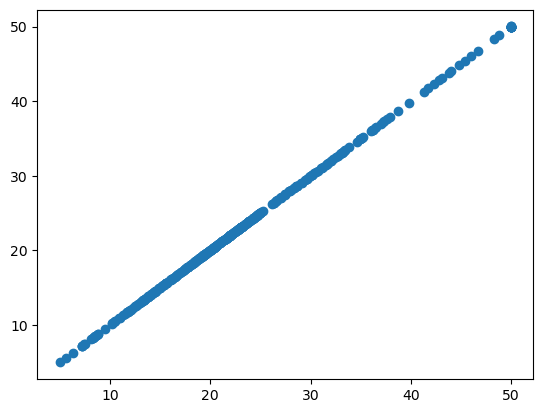

In [31]:
#visualizing the actual value and the predicted values
plt.scatter(y_train,training_data_prediction)

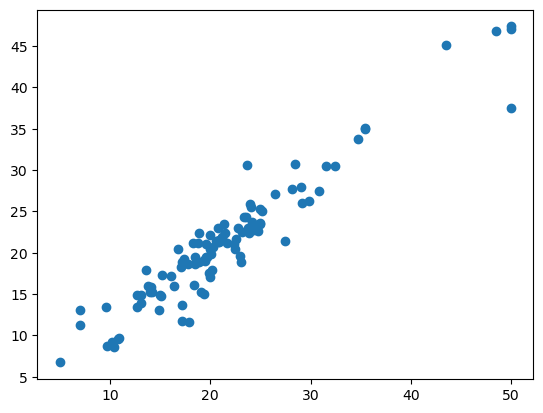

In [32]:
plt.scatter(y_test,testing_data_prediction)